<a href="https://colab.research.google.com/github/frm1789/FInal_Projects/blob/main/Parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install ydata_profiling

In [2]:
# pip install phik

In [3]:
import pandas as pd
import numpy as np
import ydata_profiling
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from phik.phik import phik_matrix
from phik.report import plot_correlation_matrix



In [4]:
#pip install pytorch_lightning

In [5]:
import os
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from torch import nn
from torch.nn import functional as F

In [6]:
plt.style.use('fivethirtyeight')

In [7]:
#https://stackoverflow.com/questions/60841425/cant-mount-google-drive-folder-in-colab-notebook
from google.colab import drive
drive.mount("/content/drive") 




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
daily_metadata_file = 'daily_metadata.csv'
defog_metadata_file = 'defog_metadata.csv'
tdcsfog_metadata_file = 'tdcsfog_metadata.csv'
events_data_file = 'events.csv'
subjects_data_file = 'subjects.csv'
tasks_data_file = 'tasks.csv'

In [9]:
# Read the meta data
daily_metadata = pd.read_csv(daily_metadata_file)
defog_metadata = pd.read_csv(defog_metadata_file)
tdcsfog_metadata = pd.read_csv(tdcsfog_metadata_file)

events_data = pd.read_csv(events_data_file)
subjects_data = pd.read_csv(subjects_data_file)
tasks_data = pd.read_csv(tasks_data_file)

In [10]:
my_path_train = "/0_Parkinson/train" # Your path
gdrive_path_train = "/content/drive" + "/My Drive" + my_path_train 

In [40]:
my_path_test = "/0_Parkinson/test" # Your path
gdrive_path_test = "/content/drive" + "/My Drive" + my_path_test 

In [118]:
tdcsfog_files = [f'{gdrive_path_test}/tdcsfog/003f117e14.csv']

dfs = tmp = []

for file in tdcsfog_files:
    df = pd.read_csv(file)
    file_id = os.path.basename(file).replace(".csv", "")
    subject = tdcsfog_metadata.loc[tdcsfog_metadata['Id'] == file_id, 'Subject'].iloc[0]
    df['Subject'] = subject
    dfs.append(df)

# Concatenate the individual DataFrames into a single DataFrame
tdcsfog_test = pd.concat(dfs)


In [119]:
tdcsfog_test

,Time,AccV,AccML,AccAP,Subject
0,0,-9.533939,0.566322,-1.413525,4dc2f8
1,1,-9.536140,0.564137,-1.440621,4dc2f8
2,2,-9.529345,0.561765,-1.429332,4dc2f8
3,3,-9.531239,0.564227,-1.415490,4dc2f8
4,4,-9.540825,0.561854,-1.429471,4dc2f8
...,...,...,...,...,...
4677,4677,-9.351431,0.370047,-2.286318,4dc2f8
4678,4678,-9.341410,0.347721,-2.321991,4dc2f8
4679,4679,-9.350667,0.361341,-2.297158,4dc2f8
4680,4680,-9.343977,0.365726,-2.292650,4dc2f8


In [120]:
tdcsfog_test = tdcsfog_test.merge(subjects_data, left_on='Subject', right_on='Subject', how='left')

In [121]:
tdcsfog_test = tdcsfog_test.drop('Visit', axis=1)

In [122]:
tdcsfog_test = tdcsfog_test.drop('Subject', axis=1)

In [124]:

tdcsfog_test['Sex'] = tdcsfog_test['Sex'].map({'F':0, 'M':1})

In [125]:
tdcsfog_test

,Time,AccV,AccML,AccAP,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,0,-9.533939,0.566322,-1.413525,68,0,9.0,17.0,15.0,15
1,1,-9.536140,0.564137,-1.440621,68,0,9.0,17.0,15.0,15
2,2,-9.529345,0.561765,-1.429332,68,0,9.0,17.0,15.0,15
3,3,-9.531239,0.564227,-1.415490,68,0,9.0,17.0,15.0,15
4,4,-9.540825,0.561854,-1.429471,68,0,9.0,17.0,15.0,15
...,...,...,...,...,...,...,...,...,...,...
4677,4677,-9.351431,0.370047,-2.286318,68,0,9.0,17.0,15.0,15
4678,4678,-9.341410,0.347721,-2.321991,68,0,9.0,17.0,15.0,15
4679,4679,-9.350667,0.361341,-2.297158,68,0,9.0,17.0,15.0,15
4680,4680,-9.343977,0.365726,-2.292650,68,0,9.0,17.0,15.0,15


In [12]:
tdcsfog_files = [f'{gdrive_path_train}/tdcsfog/{id}.csv' for id in \
                                         tdcsfog_metadata.Id.to_list()[:511]]

dfs = tmp = []

for file in tdcsfog_files:
    df = pd.read_csv(file)
    file_id = os.path.basename(file).replace(".csv", "")
    subject = tdcsfog_metadata.loc[tdcsfog_metadata['Id'] == file_id, 'Subject'].iloc[0]
    df['Subject'] = subject
    dfs.append(df)

# Concatenate the individual DataFrames into a single DataFrame
tdcsfog_data = pd.concat(dfs)


In [13]:
tdcsfog_data = tdcsfog_data.merge(subjects_data, left_on='Subject', right_on='Subject', how='left')

The ratio of positive and negative reactions in the target


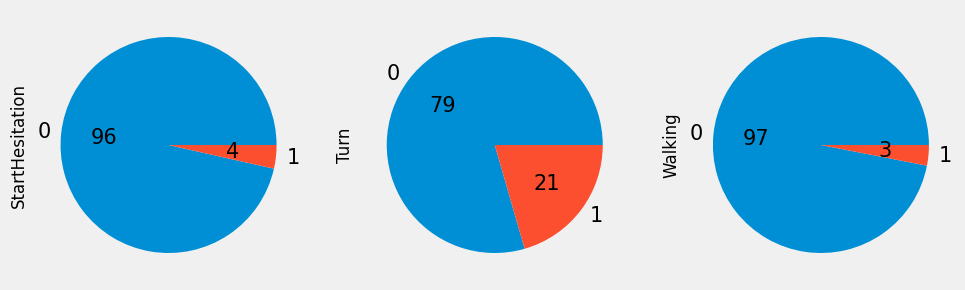

In [51]:
print('The ratio of positive and negative reactions in the target')
fig, axs = plt.subplots(ncols=3, figsize=(10, 3))
autopct='%.0f'
font_size=15
tdcsfog_data.StartHesitation.value_counts().plot.pie(autopct=autopct,fontsize=font_size, ax=axs[0])
tdcsfog_data.Turn.value_counts().plot.pie(autopct=autopct, fontsize=font_size, ax=axs[1])
tdcsfog_data.Walking.value_counts().plot.pie(autopct=autopct, fontsize=font_size, ax=axs[2])
fig.tight_layout()

#https://www.kaggle.com/code/konstantinsamolinov/support-vector-machine-for-fog-prediction

In [17]:
events_data.head()

,Id,Init,Completion,Type,Kinetic
0,003f117e14,8.61312,14.7731,Turn,1.0
1,009ee11563,11.38470,41.1847,Turn,1.0
2,009ee11563,54.66470,58.7847,Turn,1.0
3,011322847a,28.09660,30.2966,Turn,1.0
4,01d0fe7266,30.31840,31.8784,Turn,1.0


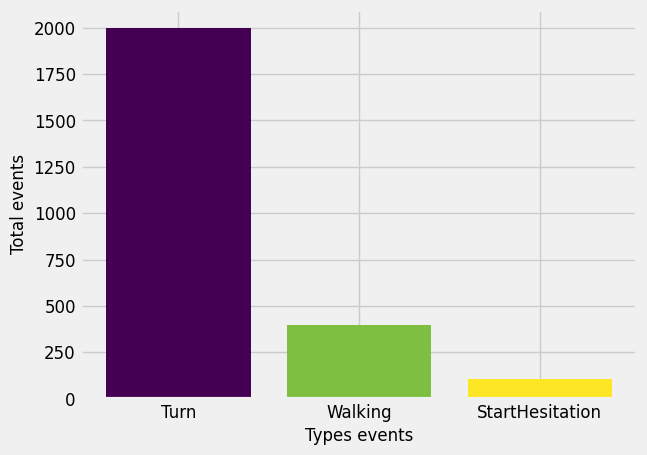

In [18]:
events_tot_counts = events_data['Type'].value_counts()
colors = ['#440154', '#7EBF41', '#FDE724']
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.bar(events_tot_counts.index, events_tot_counts.values, color= colors)
plt.xlabel('Types events', fontsize=12)
plt.ylabel('Total events', fontsize=12)
plt.show()

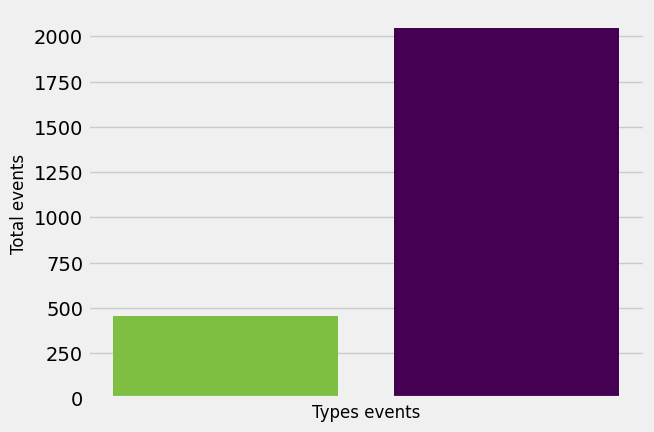

In [19]:
events_tot_counts = events_data['Kinetic'].value_counts()
colors = ['#440154', '#7EBF41']
plt.xticks(fontsize=12)
plt.xticks([])
plt.bar(events_tot_counts.index, events_tot_counts.values, color= colors)
plt.xlabel('Types events', fontsize=12)
plt.ylabel('Total events', fontsize=12)
plt.show()

In [20]:
events_data['event_duration'] = events_data['Completion'] - events_data['Init']

Text(0, 0.5, 'Duration')

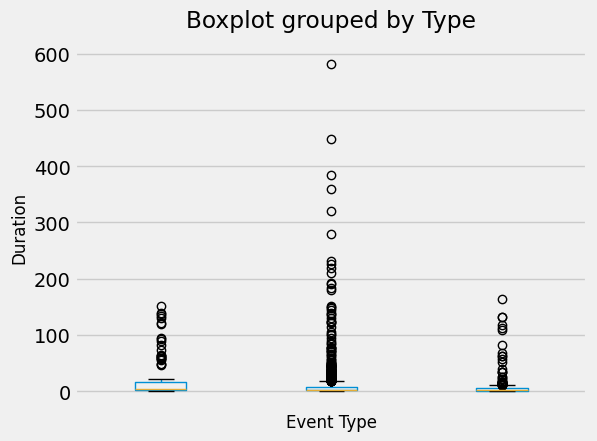

In [21]:
events_data.boxplot(column='event_duration', by='Type', grid=True)
plt.xticks([])
plt.title('')
plt.xlabel('Event Type' , fontsize=12)
plt.ylabel('Duration', fontsize=12)

### tDCS FOG (tdcsfog) dataset comprises data series collected in the lab

With subjects completed a FOG-provoking protocol.

In [22]:
tdcsfog_data.describe()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Age,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
count,4.143405e+06,4.143405e+06,4.143405e+06,4.143405e+06,4.143405e+06,4.143405e+06,4.143405e+06,4.143405e+06,4.143405e+06,4.143405e+06,3.401821e+06,4.143405e+06
mean,8.135636e+03,-9.290652e+00,-1.589144e-01,1.787486e+00,3.521669e-02,2.053495e-01,3.067260e-02,6.963837e+01,9.334731e+00,3.783560e+01,4.442855e+01,1.890280e+01
std,1.253734e+04,1.086495e+00,1.251883e+00,2.349065e+00,1.843271e-01,4.039568e-01,1.724291e-01,7.619309e+00,5.925843e+00,1.158666e+01,1.356831e+01,4.990829e+00
min,0.000000e+00,-3.552112e+01,-1.983732e+01,-3.853187e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.100000e+01,1.000000e+00,1.500000e+01,1.500000e+01,0.000000e+00
25%,2.027000e+03,-9.729501e+00,-8.913136e-01,5.733198e-01,0.000000e+00,0.000000e+00,0.000000e+00,6.500000e+01,4.000000e+00,2.900000e+01,3.700000e+01,1.600000e+01
50%,4.101000e+03,-9.333558e+00,-1.211405e-01,1.996038e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+01,9.000000e+00,3.900000e+01,4.400000e+01,2.000000e+01
75%,7.540000e+03,-8.756697e+00,5.993603e-01,3.470473e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,1.200000e+01,4.600000e+01,4.900000e+01,2.200000e+01
max,9.707600e+04,9.321786e+00,2.454049e+01,2.934183e+01,1.000000e+00,1.000000e+00,1.000000e+00,9.400000e+01,2.300000e+01,7.900000e+01,9.100000e+01,2.600000e+01


In [23]:
tdcsfog_data.head(1000)

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,0,-9.533939,0.566322,-1.413525,0,0,0,68,F,9.0,17.0,15.0,15
1,1,-9.536140,0.564137,-1.440621,0,0,0,68,F,9.0,17.0,15.0,15
2,2,-9.529345,0.561765,-1.429332,0,0,0,68,F,9.0,17.0,15.0,15
3,3,-9.531239,0.564227,-1.415490,0,0,0,68,F,9.0,17.0,15.0,15
4,4,-9.540825,0.561854,-1.429471,0,0,0,68,F,9.0,17.0,15.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,-8.988689,1.329104,2.025928,0,0,0,68,F,9.0,17.0,15.0,15
996,996,-9.019100,1.289474,1.877230,0,0,0,68,F,9.0,17.0,15.0,15
997,997,-9.026232,1.190840,1.764569,0,0,0,68,F,9.0,17.0,15.0,15
998,998,-8.986221,1.102629,1.703806,0,0,0,68,F,9.0,17.0,15.0,15


In [24]:
print(tdcsfog_data.isnull().sum())

Time                    0
AccV                    0
AccML                   0
AccAP                   0
StartHesitation         0
Turn                    0
Walking                 0
Age                     0
Sex                     0
YearsSinceDx            0
UPDRSIII_On             0
UPDRSIII_Off       741584
NFOGQ                   0
dtype: int64


<ipython-input-25-474f03c57c12>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = tdcsfog_data.corr()


<Axes: >

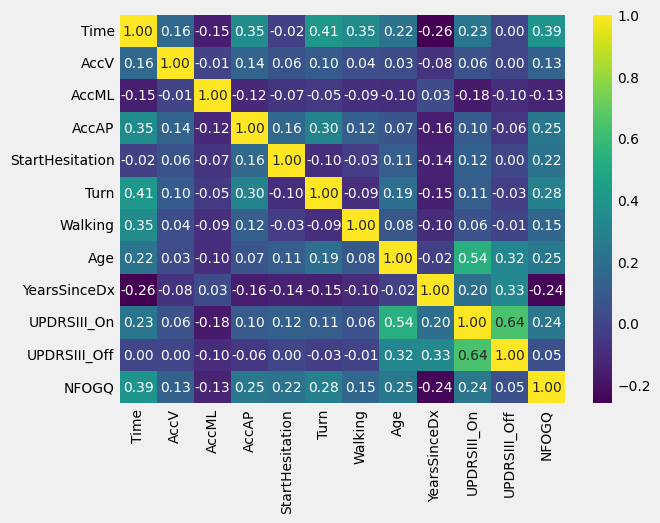

In [25]:
corr = tdcsfog_data.corr()
plt.rcParams['font.size'] = 10
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f")



## SVN

In [26]:
tdcsfog_data['Sex'] = tdcsfog_data['Sex'].map({'F':0, 'M':1})

In [52]:
tdcsfog_data

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,0,-9.533939,0.566322,-1.413525,0,0,0,68,0,9.0,17.0,15.0,15
1,1,-9.536140,0.564137,-1.440621,0,0,0,68,0,9.0,17.0,15.0,15
2,2,-9.529345,0.561765,-1.429332,0,0,0,68,0,9.0,17.0,15.0,15
3,3,-9.531239,0.564227,-1.415490,0,0,0,68,0,9.0,17.0,15.0,15
4,4,-9.540825,0.561854,-1.429471,0,0,0,68,0,9.0,17.0,15.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143400,7660,-9.582446,0.514249,-0.590428,0,0,0,52,1,4.0,16.0,27.0,16
4143401,7661,-9.582610,0.511811,-0.592782,0,0,0,52,1,4.0,16.0,27.0,16
4143402,7662,-9.568429,0.503159,-0.581003,0,0,0,52,1,4.0,16.0,27.0,16
4143403,7663,-9.575156,0.510200,-0.574036,0,0,0,52,1,4.0,16.0,27.0,16


In [28]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [29]:
from sklearn.svm import LinearSVC

In [30]:
y = tdcsfog_data[['StartHesitation', 'Turn', 'Walking']]                       # target
X = tdcsfog_data.drop(['StartHesitation', 'Turn', 'Walking'], axis=1)

In [31]:
#https://www.kaggle.com/questions-and-answers/132668
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [32]:
from sklearn.svm import SVC

In [95]:
def apply_models_SVN_out_of_the_box(X, y):

    #Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SVN
    svm = LinearSVC()
    svm.fit(X_train_scaled, y_train)
    svm_preds_train = svm.predict(X_train_scaled)
    svm_preds_test = svm.predict(X_test_scaled)
    svm_accuracy_train = accuracy_score(y_train, svm_preds_train)
    svm_accuracy_test = accuracy_score(y_test, svm_preds_test)


    # Create a grid to display the results
    results = pd.DataFrame(
        {
            'Model': ['SVN '],
            'Accuracy/RMSE (Train)': [svm_accuracy_train],
            'Accuracy/RMSE (Test)': [svm_accuracy_test]
        }
    )
    print(results)
    return (svm)

In [96]:
model = apply_models_SVN_out_of_the_box(X, y['StartHesitation'])

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


  Model  Accuracy/RMSE (Train)  Accuracy/RMSE (Test)
0  SVN                0.980532              0.980267


### Prepare for submit

In [138]:
tdcsfog_test

,Time,AccV,AccML,AccAP,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,0,-9.533939,0.566322,-1.413525,68,0,9.0,17.0,15.0,15
1,1,-9.536140,0.564137,-1.440621,68,0,9.0,17.0,15.0,15
2,2,-9.529345,0.561765,-1.429332,68,0,9.0,17.0,15.0,15
3,3,-9.531239,0.564227,-1.415490,68,0,9.0,17.0,15.0,15
4,4,-9.540825,0.561854,-1.429471,68,0,9.0,17.0,15.0,15
...,...,...,...,...,...,...,...,...,...,...
4677,4677,-9.351431,0.370047,-2.286318,68,0,9.0,17.0,15.0,15
4678,4678,-9.341410,0.347721,-2.321991,68,0,9.0,17.0,15.0,15
4679,4679,-9.350667,0.361341,-2.297158,68,0,9.0,17.0,15.0,15
4680,4680,-9.343977,0.365726,-2.292650,68,0,9.0,17.0,15.0,15
